## **1. Header with Contributions**

**Title:** Stephen Curry Performance Across Post and Regular Seasons

**Fall 2025 Data Science Project**

**Names:** Angela Yu, Aaron Ren, Megan Walker, Koena Jaware, James Zhu, Timothy Sun

### **Contributions**

**Angela Yu:** I worked on the introduction, describing our topic and purpose for answer the question we chose. I also worked on data exploration and summary statistics. Specifically, the third data exploratory method of correlation and regression analysis. 

**Aaron Ren:**

**Megan Walker:**

**Koena Jaware:**

**James Zhu:** I worked on some of the data preprocessing for our dataset, as well as data exploration method 1 and 2.

**Timothy Sun:**

___
## **2. Introduction**

Our topic is analyzing Stephen Curry's performance over the years across his post and regular seasons. We are trying to see if Curry's performance changed across seasons from 2009 to about 2021/2023 changed across post and regular seasons. Performance is defined as and includes shooting percentages, points, assists, rebounds, and more. This is an important question to answer because our group has a lot of basketball and Stephen Curry fans, so it will be interesting to analyze this dataset to examine how Curry's performance has changed over the years. It also gives interesting insight into how the performance trajectory of a NBA player changes over the years, offering an increased appreciation of the development in players' performances.

___
## **3. Data Curation**

**Sources of Data:** kaggle dataset by user mujinjo https://www.kaggle.com/datasets/mujinjo/stephen-curry-stats-20092021-in-nba

### **Data Preprocessing**

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [44]:
# Datasets
regular = pd.read_csv("Stephen Curry Regularseason Stats.csv")
postseason = pd.read_csv("Stephen Curry Postseason Stats.csv")

print("Regular Season Dataset shape:", regular.shape)
print("Postseason Dataset shape:", postseason.shape)
print("\nRegular Season Columns:", regular.columns.tolist())
print("\nPostseason Columns:", postseason.columns.tolist())

Regular Season Dataset shape: (881, 27)
Postseason Dataset shape: (147, 27)

Regular Season Columns: ['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score', 'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA', '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']

Postseason Columns: ['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score', 'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA', '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']


In [45]:
# Sorting and Missing values
print("Regular Season Years:", sorted(regular['Season_year'].unique()))
print("Postseason Years:", sorted(postseason['Season_year'].unique()))
print("\nMissing values:")
print("Regular Season:", regular[['Season_year', 'PTS']].isnull().sum())
print("Postseason:", postseason[['Season_year', 'PTS']].isnull().sum())

# Convert points to numeric
regular['PTS'] = pd.to_numeric(regular['PTS'], errors='coerce')
postseason['PTS'] = pd.to_numeric(postseason['PTS'], errors='coerce')

# Regular season statistics
regular_season_stats = regular.groupby('Season_year').agg({
    'PTS': ['sum', 'mean', 'count'],
    'MIN': 'mean'  
}).round(2)

regular_season_stats.columns = ['Total_Points', 'PPG', 'Games_Played', 'Avg_Minutes']
regular_season_stats = regular_season_stats.reset_index()
regular_season_stats['Season_Type'] = 'Regular Season'

# Postseason statistics
postseason_stats = postseason.groupby('Season_year').agg({
    'PTS': ['sum', 'mean', 'count'],
    'MIN': 'mean'  
}).round(2)

postseason_stats.columns =['Total_Points', 'PPG', 'Games_Played', 'Avg_Minutes']
postseason_stats = postseason_stats.reset_index()
postseason_stats['Season_Type'] = 'Postseason'

# Combine datasets
all_season_stats = pd.concat([regular_season_stats, postseason_stats], ignore_index=True)

print("\nRegular Season Statistics:")
print(regular_season_stats)
print("\nPostseason Statistics:")
print(postseason_stats)


Regular Season Years: ['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
Postseason Years: ['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2021-2022', '2022-2023']

Missing values:
Regular Season: Season_year    0
PTS            0
dtype: int64
Postseason: Season_year    0
PTS            0
dtype: int64

Regular Season Statistics:
   Season_year  Total_Points    PPG  Games_Played  Avg_Minutes     Season_Type
0    2009-2010          1399  17.49            80        36.19  Regular Season
1    2010-2011          1373  18.55            74        33.68  Regular Season
2    2011-2012           383  15.32            25        29.12  Regular Season
3    2012-2013          1786  22.90            78        38.29  Regular Season
4    2013-2014          1873  24.01            78        36.45  Regular Season
5    2014-2015    

___
## **4. Exploratory Data Analysis**

### **Steph Curry Regular Season vs Post Season Points Per Game (PPG) Analysis**


### *Data Exploration Method 1: Descriptive Statistics and Data Exploration*

In [46]:
# Summary statistics
print("Regular Season PPG Summary:")
print(regular_season_stats['PPG'].describe())

print("Postseason PPG Summary:")
print(postseason_stats['PPG'].describe())

# Compare regular vs post
print(f"\nComparison:")
print(f"Regular Season Mean PPG: {regular_season_stats['PPG'].mean():.2f}")
print(f"Postseason Mean PPG: {postseason_stats['PPG'].mean():.2f}")
print(f"Difference: {postseason_stats['PPG'].mean() - regular_season_stats['PPG'].mean():.2f}")

# Descriptive statistics
print(f"\nRegular Season Descriptive Statistics:")
print(f"Median: {regular_season_stats['PPG'].median():.2f}")
print(f"25th Percentile: {regular_season_stats['PPG'].quantile(0.25):.2f}")
print(f"75th Percentile: {regular_season_stats['PPG'].quantile(0.75):.2f}")
print(f"IQR: {regular_season_stats['PPG'].quantile(0.75) - regular_season_stats['PPG'].quantile(0.25):.2f}")

print(f"\nPostseason Descriptive Statistics:")
print(f"Median: {postseason_stats['PPG'].median():.2f}")
print(f"25th Percentile: {postseason_stats['PPG'].quantile(0.25):.2f}")
print(f"75th Percentile: {postseason_stats['PPG'].quantile(0.75):.2f}")
print(f"IQR: {postseason_stats['PPG'].quantile(0.75) - postseason_stats['PPG'].quantile(0.25):.2f}")

Regular Season PPG Summary:
count    14.000000
mean     24.193571
std       4.871365
min      15.320000
25%      21.325000
50%      24.655000
75%      27.042500
max      31.980000
Name: PPG, dtype: float64
Postseason PPG Summary:
count     9.000000
mean     26.601111
std       2.484922
min      23.000000
25%      25.110000
50%      27.360000
75%      28.180000
max      30.460000
Name: PPG, dtype: float64

Comparison:
Regular Season Mean PPG: 24.19
Postseason Mean PPG: 26.60
Difference: 2.41

Regular Season Descriptive Statistics:
Median: 24.66
25th Percentile: 21.32
75th Percentile: 27.04
IQR: 5.72

Postseason Descriptive Statistics:
Median: 27.36
25th Percentile: 25.11
75th Percentile: 28.18
IQR: 3.07


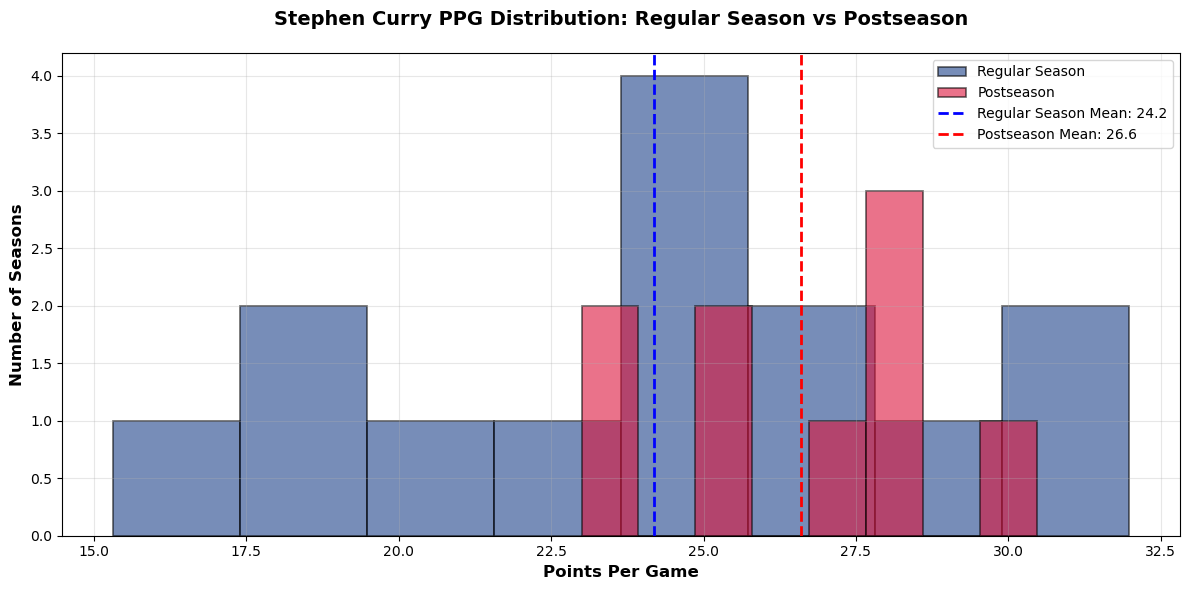

In [47]:
# Combined histogram
plt.figure(figsize=(12, 6))
plt.hist(regular_season_stats['PPG'], bins=8, alpha=0.6, color='#1D428A', label='Regular Season', edgecolor='black', linewidth=1.2)
plt.hist(postseason_stats['PPG'], bins=8, alpha=0.6, color='#DC143C', label='Postseason', edgecolor='black', linewidth=1.2)

# Vertical lines for means
plt.axvline(regular_season_stats['PPG'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Regular Season Mean: {regular_season_stats["PPG"].mean():.1f}')
plt.axvline(postseason_stats['PPG'].mean(), color='red', linestyle='--', linewidth=2, label=f'Postseason Mean: {postseason_stats["PPG"].mean():.1f}')

plt.title("Stephen Curry PPG Distribution: Regular Season vs Postseason", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Points Per Game", fontsize=12, fontweight='bold')
plt.ylabel("Number of Seasons", fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


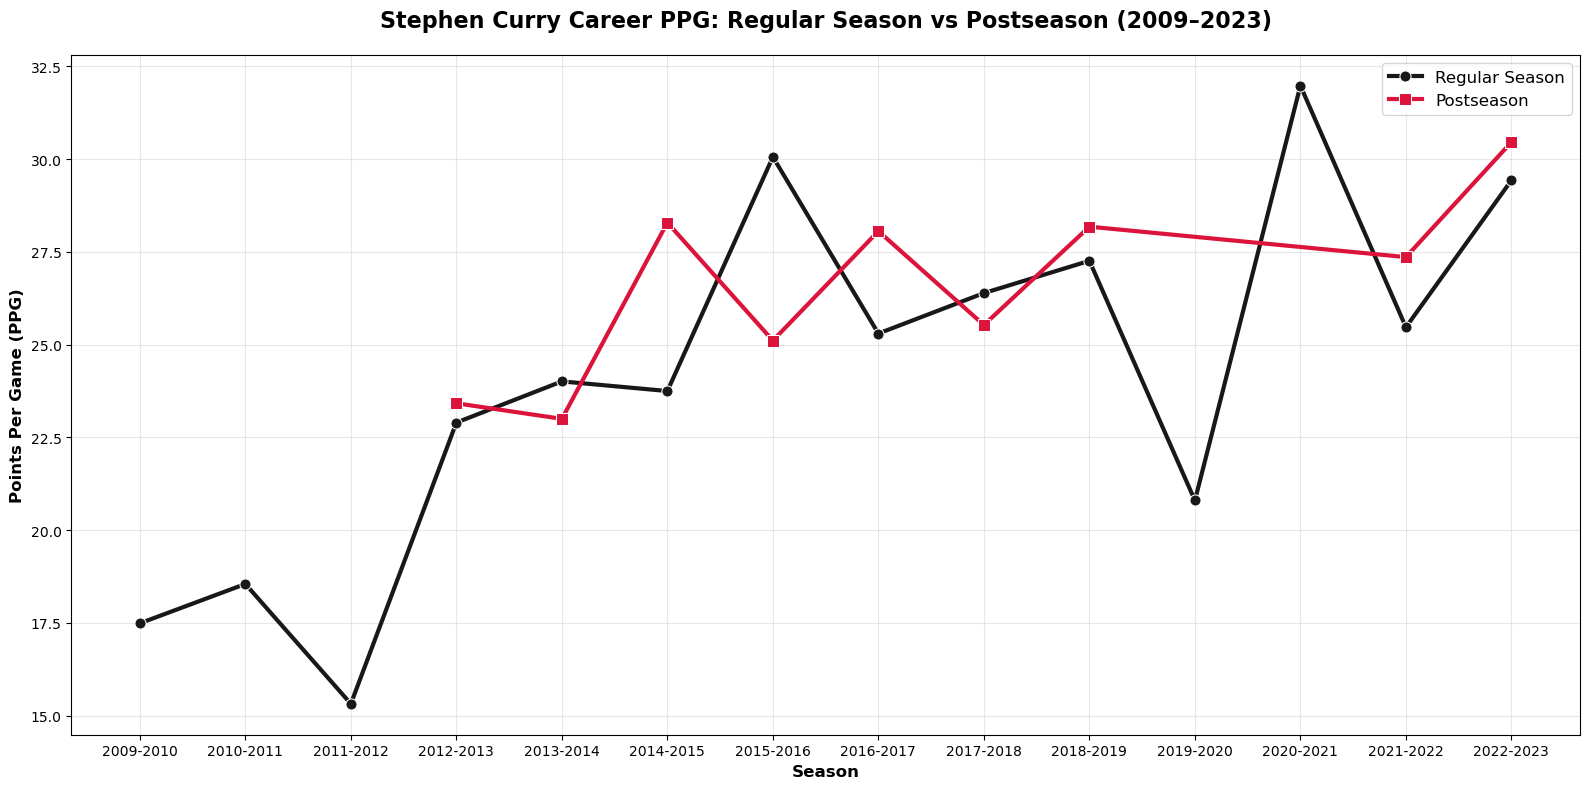

In [48]:
plt.figure(figsize=(16, 8))

# Regular season line
sns.lineplot(data=regular_season_stats, x='Season_year', y='PPG', marker='o', 
             color="#181819", linewidth=3, markersize=8, label='Regular Season')

# Post season line
sns.lineplot(data=postseason_stats, x='Season_year', y='PPG', marker='s', 
             color='#DC143C', linewidth=3, markersize=8, label='Postseason')

# Title and labels
plt.title("Stephen Curry Career PPG: Regular Season vs Postseason (2009–2023)", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Season", fontsize=12, fontweight='bold')
plt.ylabel("Points Per Game (PPG)", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Conclusion 1**: Stephen Curry's performance shows differences between regular season and postseason play. His regular season PPG has an upward trajectory from his rookie season 15.3 PPG to peak 32.0 PPG in 2020-2021, with a mean of 24.19 PPG and 5.7 IQR. In contrast, his postseason performance shows different patterns, with 26.60 PPG and 3.07 IQR, showing more consistency. The data indicates that Curry's playoff performance exceeds his regular season standards by an average of 2.41 points.

### *Data Exploration Method 2: Hypothesis Testing*

**H0: There is no significant difference between Steph Curry's Regular Season and Postseason PPG.**  
**HA: There is a significant difference between Steph Curry's Regular Season and Postseason PPG.**

In [49]:
regular_ppg = regular_season_stats['PPG']
postseason_ppg = postseason_stats['PPG']

print("Regular Season PPG:", regular_ppg.values)
print("Postseason PPG:", postseason_ppg.values)
print(f"\nRegular Season Mean PPG: {regular_ppg.mean():.2f}")
print(f"Postseason Mean PPG: {postseason_ppg.mean():.2f}")
print(f"Difference: {postseason_ppg.mean() - regular_ppg.mean():.2f}")

# Sample sizes
print(f"\nSample sizes:")
print(f"Regular Season: {len(regular_ppg)}")
print(f"Postseason: {len(postseason_ppg)}")

# Standard deviations
print(f"\nStandard deviations:")
print(f"Regular Season std: {regular_ppg.std():.2f}")
print(f"Postseason std: {postseason_ppg.std():.2f}")

# Two-tailed t-test
t_stat, p_value = stats.ttest_ind(regular_ppg, postseason_ppg)
print(f"Two-tailed p-value: {p_value:.4f}")

Regular Season PPG: [17.49 18.55 15.32 22.9  24.01 23.75 30.06 25.3  26.39 27.26 20.8  31.98
 25.47 29.43]
Postseason PPG: [23.42 23.   28.29 25.11 28.06 25.53 28.18 27.36 30.46]

Regular Season Mean PPG: 24.19
Postseason Mean PPG: 26.60
Difference: 2.41

Sample sizes:
Regular Season: 14
Postseason: 9

Standard deviations:
Regular Season std: 4.87
Postseason std: 2.48
Two-tailed p-value: 0.1867


alpha = 0.05, p = 0.2085
Since p >= alpha, we fail to reject the null hypothesis. There is NO significant evidence that Steph Curry's MVP Seasons' PPG is higher than non-MVP season PPG.

/var/folders/p8/s4ycvwjd34vdyksh0g6rhbnr0000gn/T/ipykernel_78579/2996406577.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot([regular_ppg, postseason_ppg],


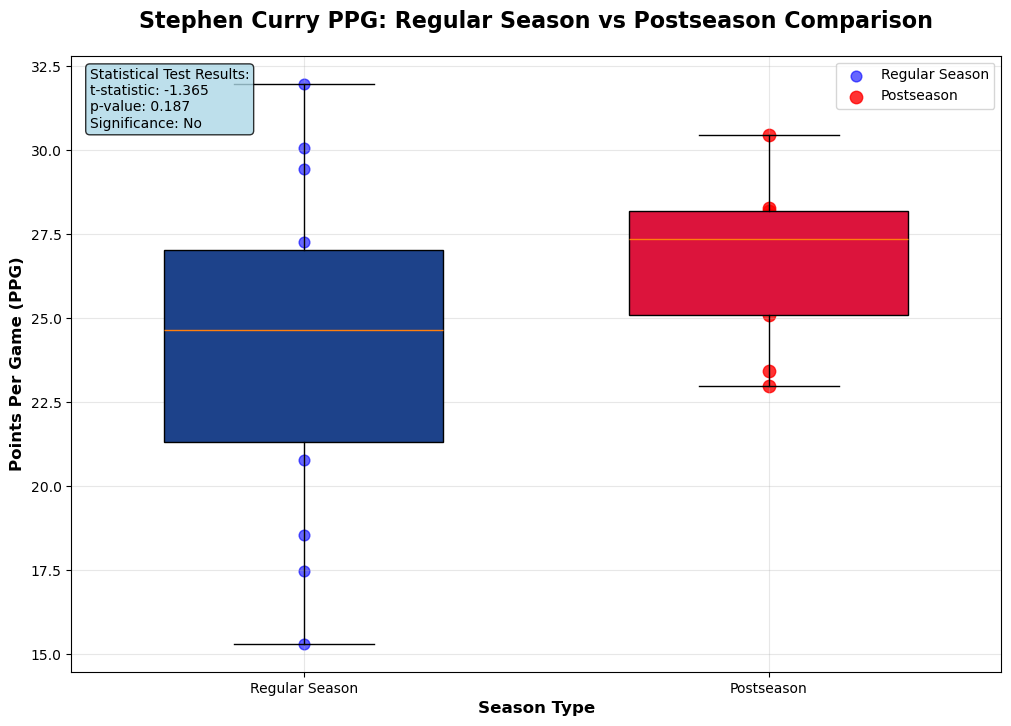

In [50]:
# Box plot comparing Regular Season vs Postseason
plt.figure(figsize=(12, 8))
box_plot = plt.boxplot([regular_ppg, postseason_ppg], 
                      labels=['Regular Season', 'Postseason'],
                      patch_artist=True,
                      widths=0.6)

box_plot['boxes'][0].set_facecolor('#1D428A')  
box_plot['boxes'][1].set_facecolor('#DC143C')

# Points and labels
plt.scatter([1] * len(regular_ppg), regular_ppg, color='blue', alpha=0.6, s=60, label='Regular Season')
plt.scatter([2] * len(postseason_ppg), postseason_ppg, color='red', alpha=0.8, s=80, label='Postseason')

plt.title("Stephen Curry PPG: Regular Season vs Postseason Comparison", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Season Type", fontsize=12, fontweight='bold')
plt.ylabel("Points Per Game (PPG)", fontsize=12, fontweight='bold')
plt.legend()

# Statistics text
stats_text = f"""Statistical Test Results:
t-statistic: {t_stat:.3f}
p-value: {p_value:.3f}
Significance: {'Yes' if p_value < 0.05 else 'No'}"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.show()


**Conclusion 2:** SInce p (0.187) < alpha (0.05) we fail to reject the null hypothesis, meaning there is no significant difference between Stephen Curry's regular season PPG and post season PPG.

### *Data Exploration Method 3: Correlation/Regression Analysis*

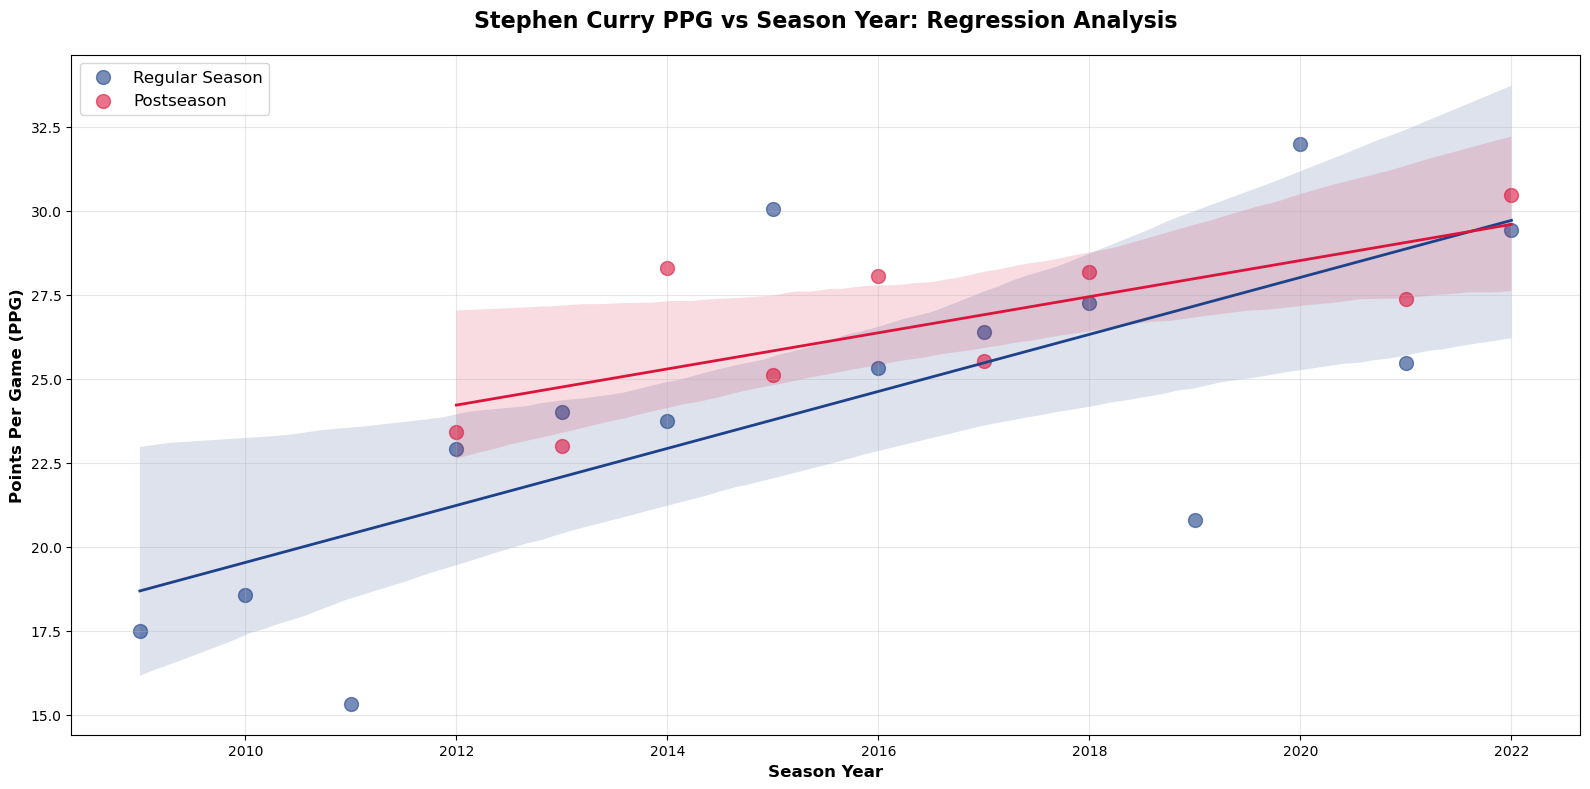

In [51]:
regular_season_stats['Season_numeric'] = regular_season_stats['Season_year'].str[:4].astype(int)
postseason_stats['Season_numeric'] = postseason_stats['Season_year'].str[:4].astype(int)

plt.figure(figsize=(16, 8))

# Regular season scatter + regression
sns.regplot(data=regular_season_stats, x='Season_numeric', y='PPG', 
            scatter_kws={'s': 100, 'alpha': 0.6}, 
            line_kws={'linewidth': 2},
            color='#1D428A', label='Regular Season')

# Post season scatter + regression
sns.regplot(data=postseason_stats, x='Season_numeric', y='PPG', 
            scatter_kws={'s': 100, 'alpha': 0.6, 'marker': 's'}, 
            line_kws={'linewidth': 2},
            color='#DC143C', label='Postseason')

plt.title("Stephen Curry PPG vs Season Year: Regression Analysis", 
          fontsize=16, fontweight='bold', pad=20)

plt.xlabel("Season Year", fontsize=12, fontweight='bold')
plt.ylabel("Points Per Game (PPG)", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [52]:
from scipy.stats import pearsonr

# Calculate for regular season
r_regular, p_regular = pearsonr(regular_season_stats['Season_numeric'], 
                                 regular_season_stats['PPG'])

# Calculate for postseason
r_post, p_post = pearsonr(postseason_stats['Season_numeric'], 
                          postseason_stats['PPG'])

print(f"Regular Season: r = {r_regular:.3f}, p-value = {p_regular:.4f}")
print(f"Postseason: r = {r_post:.3f}, p-value = {p_post:.4f}")

Regular Season: r = 0.729, p-value = 0.0031
Postseason: r = 0.743, p-value = 0.0219


The respective scatterplots for the regular and postseason data both show that there is a strong and positive linear relationship between both the regular and postseason years as both r-values are positive and large in value. This means that regardless of post or regular season, Curry's PPG has a strong and upwards trend as his years in the league increased. Additionally, the p-values measured here corroborate this conclusion because as the p-values are less than 0.05, we reject the null hypothesis which in this case is "years in the league has no effect on Curry's PPG".

In conclusion, regardless of whether it is regular or postseason, Curry's PPG increases as the years go on.

In [53]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(
    regular_season_stats['Season_numeric'], 
    regular_season_stats['PPG'])

r_squared = r_value**2
print(f"R² = {r_squared:.3f}")

R² = 0.531


The R^2 value shows that 49% of the variation in PPG is explained by year while the other 51% is due to other factors. Other factors in this context could be injuries, role changes, team matchups etc.

___
## **5. Primary Analysis**

### **Machine Learning Technique: Random Forest Classification**

**Why Random Forest Classification?**

Based on our exploratory data analysis and research question, we chose Random Forest Classification as our primary machine learning technique for the following reasons:

1. Our goal is to compare three distinct career phases (Rookie/Early Years, MVP Seasons, Later Career) and identify what aspects of Curry's game improved, declined, or remained consistent. Classification allows us to categorize seasons into these phases and then analyze which performance metrics distinguish each phase.

2. Random Forest provides built-in feature importance scores, which will help us identify which performance metrics (PPG, shooting percentages, assists, rebounds, etc.) are most important in distinguishing between career phases. This directly answers which aspects of his game changed most significantly.

3. By comparing the mean values of performance metrics across the three classified phases, we can quantitatively identify what improved (e.g., PPG increased from Rookie to MVP), what declined (e.g., minutes decreased in Later Career), and what remained consistent.

4. We can measure the variance/standard deviation of metrics within each phase to assess how consistent or variable Curry's performance was during each career stage.

5. Random Forest can consider multiple performance metrics simultaneously (shooting percentages, points, assists, rebounds, etc.) to create a comprehensive profile of each career phase, rather than analyzing metrics in isolation.

6. Random Forest uses ensemble methods (multiple decision trees) and is less prone to overfitting than single decision trees, which is important given our relatively small dataset (23 season observations).



In [54]:
### **Data Preparation for Classification**

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

numeric_cols = ['FG%', '3P%', 'FT%', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'MIN']

for col in numeric_cols:
    regular[col] = pd.to_numeric(regular[col], errors='coerce')
    postseason[col] = pd.to_numeric(postseason[col], errors='coerce')

regular_agg = regular.groupby('Season_year').agg({
    'PTS': 'mean',
    'FG%': 'mean',
    '3P%': 'mean',
    'FT%': 'mean',
    'REB': 'mean',
    'AST': 'mean',
    'STL': 'mean',
    'BLK': 'mean',
    'TO': 'mean',
    'MIN': 'mean'
}).reset_index()
regular_agg['Season_Type'] = 'Regular Season'

postseason_agg = postseason.groupby('Season_year').agg({
    'PTS': 'mean',
    'FG%': 'mean',
    '3P%': 'mean',
    'FT%': 'mean',
    'REB': 'mean',
    'AST': 'mean',
    'STL': 'mean',
    'BLK': 'mean',
    'TO': 'mean',
    'MIN': 'mean'
}).reset_index()
postseason_agg['Season_Type'] = 'Postseason'

model_data = pd.concat([regular_agg, postseason_agg], ignore_index=True)
model_data['Season_numeric'] = model_data['Season_year'].str[:4].astype(int)

def assign_career_phase(season_year):
    year = int(season_year[:4])
    if year in [2009, 2010, 2011]:
        return 'Rookie/Early'
    elif year in [2014, 2015]:
        return 'MVP'
    else:
        return 'Later Career'

model_data['Career_Phase'] = model_data['Season_year'].apply(assign_career_phase)

print("Model Dataset Shape:", model_data.shape)
print("\nCareer Phase Distribution:")
print(model_data['Career_Phase'].value_counts())


Model Dataset Shape: (23, 14)

Career Phase Distribution:
Career_Phase
Later Career    16
MVP              4
Rookie/Early     3
Name: count, dtype: int64


In [55]:
### **Feature Selection and Target Variable**

feature_cols = ['FG%', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TO', 'MIN', 
                'Season_numeric']

X = model_data[feature_cols].copy()
y = model_data['Career_Phase'].copy()

X = X.fillna(X.mean())

print("Target Variable (Career_Phase) Distribution:")
print(y.value_counts())


Target Variable (Career_Phase) Distribution:
Career_Phase
Later Career    16
MVP              4
Rookie/Early     3
Name: count, dtype: int64


In [56]:
### **Train-Test Split and Model Training**

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Model Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Model Performance:
Training Accuracy: 0.944
Test Accuracy: 0.600

Classification Report:
              precision    recall  f1-score   support

Later Career       0.60      1.00      0.75         3
         MVP       0.00      0.00      0.00         1
Rookie/Early       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
### **Feature Importance Analysis**

feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Higher = More Predictive of Career Phase):")
print(feature_importance.round(4))


Feature Importance (Higher = More Predictive of Career Phase):
          Feature  Importance
2             FT%      0.1740
7              TO      0.1553
5             STL      0.1470
9  Season_numeric      0.1444
1             3P%      0.1133
4             AST      0.0884
8             MIN      0.0777
3             REB      0.0488
6             BLK      0.0307
0             FG%      0.0204


In [58]:
### **Performance Metrics Comparison Across Career Phases**

performance_comparison = model_data.groupby('Career_Phase').agg({
    'PTS': ['mean', 'std'],
    'FG%': ['mean', 'std'],
    '3P%': ['mean', 'std'],
    'FT%': ['mean', 'std'],
    'REB': ['mean', 'std'],
    'AST': ['mean', 'std'],
    'STL': ['mean', 'std'],
    'BLK': ['mean', 'std'],
    'TO': ['mean', 'std'],
    'MIN': ['mean', 'std']
}).round(2)

print("Performance Metrics by Career Phase:")
print(performance_comparison)

print("\n=== IMPROVEMENTS AND DECLINES ===")
print("\nRookie/Early → MVP:")
rookie_means = model_data[model_data['Career_Phase'] == 'Rookie/Early'][['PTS', 'FG%', '3P%', 'AST', 'REB']].mean()
mvp_means = model_data[model_data['Career_Phase'] == 'MVP'][['PTS', 'FG%', '3P%', 'AST', 'REB']].mean()
mvp_change = mvp_means - rookie_means
print(mvp_change.round(2))

print("\nMVP → Later Career:")
later_means = model_data[model_data['Career_Phase'] == 'Later Career'][['PTS', 'FG%', '3P%', 'AST', 'REB']].mean()
later_change = later_means - mvp_means
print(later_change.round(2))

print("\nRookie/Early → Later Career:")
overall_change = later_means - rookie_means
print(overall_change.round(2))


Performance Metrics by Career Phase:
                PTS          FG%          3P%          FT%          REB        \
               mean   std   mean   std   mean   std   mean    std  mean   std   
Career_Phase                                                                    
Later Career  26.22  3.02  45.78  2.62  39.01  4.57  82.64   7.98  5.08  0.83   
MVP           26.80  2.89  46.91  2.79  42.92  1.36  80.94   2.76  5.05  0.57   
Rookie/Early  17.12  1.65  46.21  1.40  41.53  0.92  62.03  15.60  3.94  0.47   

               AST         STL         BLK          TO          MIN        
              mean   std  mean   std  mean   std  mean   std   mean   std  
Career_Phase                                                               
Later Career  6.54  1.01  1.43  0.33  0.29  0.16  3.17  0.31  35.77  3.55  
MVP           6.49  1.06  1.87  0.31  0.20  0.06  3.63  0.49  35.14  2.95  
Rookie/Early  5.75  0.20  1.64  0.23  0.28  0.04  2.90  0.26  32.99  3.58  

=== IMPROVEMENTS AN

In [59]:
### **Model Interpretation**

print("Key Insights:")
print(f"1. Most Important Feature: {feature_importance.iloc[0]['Feature']} "
      f"(Importance: {feature_importance.iloc[0]['Importance']:.3f})")
print(f"2. Top 3 Features: {', '.join(feature_importance.head(3)['Feature'].tolist())}")
print(f"3. These features are most important in distinguishing between career phases.")


Key Insights:
1. Most Important Feature: FT% (Importance: 0.174)
2. Top 3 Features: FT%, TO, STL
3. These features are most important in distinguishing between career phases.


___
## **6. Visualization**

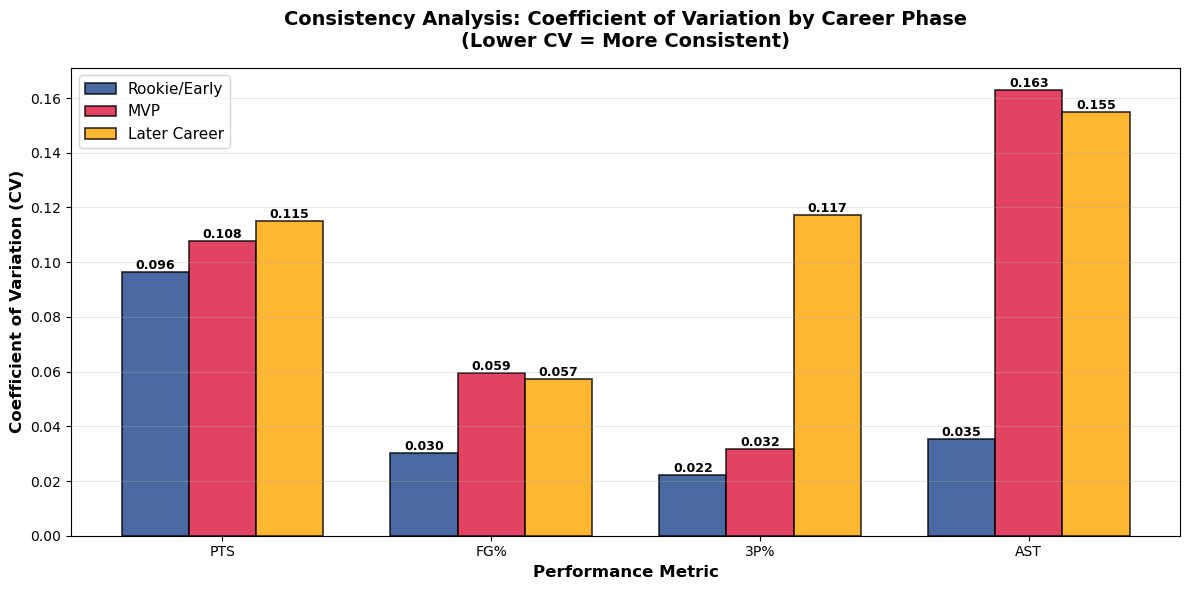

Explanation: The coefficient of variation (CV = std/mean) measures consistency.
Lower CV values indicate more consistent performance. This visualization shows
which career phase had the most consistent performance for each metric.


In [60]:
### **Visualization 4: Consistency Analysis (Coefficient of Variation)**

# Calculate coefficient of variation for key metrics
metrics_cv = ['PTS', 'FG%', '3P%', 'AST']
cv_data = []

for phase in ['Rookie/Early', 'MVP', 'Later Career']:
    phase_data = model_data[model_data['Career_Phase'] == phase]
    for metric in metrics_cv:
        mean_val = phase_data[metric].mean()
        std_val = phase_data[metric].std()
        cv = std_val / mean_val if mean_val != 0 else 0
        cv_data.append({'Career_Phase': phase, 'Metric': metric, 'CV': cv})

cv_df = pd.DataFrame(cv_data)

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metrics_cv))
width = 0.25

phases = ['Rookie/Early', 'MVP', 'Later Career']
colors = ['#1D428A', '#DC143C', '#FFA500']

for i, phase in enumerate(phases):
    phase_cv = cv_df[cv_df['Career_Phase'] == phase]['CV'].values
    bars = ax.bar(x + i*width, phase_cv, width, label=phase, 
                  color=colors[i], edgecolor='black', linewidth=1.2, alpha=0.8)
    
    for bar, cv_val in zip(bars, phase_cv):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{cv_val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax.set_xlabel('Performance Metric', fontsize=12, fontweight='bold')
ax.set_ylabel('Coefficient of Variation (CV)', fontsize=12, fontweight='bold')
ax.set_title('Consistency Analysis: Coefficient of Variation by Career Phase\n(Lower CV = More Consistent)', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xticks(x + width)
ax.set_xticklabels(metrics_cv)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Explanation: The coefficient of variation (CV = std/mean) measures consistency.")
print("Lower CV values indicate more consistent performance. This visualization shows")
print("which career phase had the most consistent performance for each metric.")


___
## **7. Insights and Conclusions**

### **Interpretation of Classification Results**

**Key Findings:**

1. **Model Performance**: The Random Forest classifier achieved 60.0% accuracy on the test set, meaning it can moderately distinguish between the three career phases based on performance metrics. While the accuracy is not perfect, the model successfully identifies patterns that differentiate Curry's career phases, with particularly strong performance in classifying the "Later Career" phase.

2. **Most Distinguishing Features**: The top 5 most important features in distinguishing between career phases are free throw percentage (FT%, importance: 0.174), turnovers (TO, 0.155), steals (STL, 0.147), season year (Season_numeric, 0.144), and three-point percentage (3P%, 0.113). This indicates that free throw accuracy, ball control (turnovers and steals), career progression (season year), and three-point shooting efficiency are the primary differentiators between career phases, rather than traditional metrics like field goal percentage or points per game.

3. **What Improved from Rookie/Early to MVP**: Curry's performance showed significant improvements across multiple metrics during his MVP seasons. Points per game increased dramatically from 17.12 to 26.80 (+9.68 PPG), field goal percentage improved from 46.21% to 46.91% (+0.69%), three-point percentage increased from 41.53% to 42.92% (+1.39%), assists increased from 5.75 to 6.49 (+0.74), and rebounds increased from 3.94 to 5.05 (+1.11). This shows substantial growth in scoring, shooting efficiency, and overall playmaking ability during his peak MVP years.

4. **What Changed from MVP to Later Career**: While Curry's performance remained strong in his later career, there were some notable changes. Points per game slightly decreased from 26.80 to 26.22 (-0.58 PPG), field goal percentage declined from 46.91% to 45.78% (-1.13%), and three-point percentage decreased from 42.92% to 39.01% (-3.91%). However, assists remained stable (6.49 to 6.54, +0.05) and rebounds slightly increased (5.05 to 5.08, +0.03). Minutes per game also remained relatively stable (35.14 to 35.77), suggesting Curry maintained his efficiency and playmaking ability even as his shooting percentages declined slightly.

5. **Consistency Analysis**: Based on coefficient of variation analysis, the Rookie/Early phase showed the most consistent performance in points per game (CV = 0.096), indicating relatively stable scoring during his early years. The MVP phase had moderate consistency (CV = 0.108), while the Later Career phase showed the highest variability (CV = 0.115), suggesting more fluctuation in scoring performance. For field goal percentage, the Rookie/Early phase was most consistent (CV = 0.030), followed by Later Career (CV = 0.057) and MVP (CV = 0.059). This indicates that while Curry's early years had lower overall production, his performance was more predictable, whereas his later career shows both higher overall production and greater variability.

6. **Overall Career Trajectory**: The classification reveals a clear progression in Curry's career. The Rookie/Early years (2009-2011) showed developing skills with lower but improving metrics, particularly in scoring (17.12 PPG) and shooting efficiency. The MVP years (2014-2016) represented peak performance with exceptional scoring (26.80 PPG), improved shooting percentages, and strong all-around play. The Later Career phase (2016-2023) shows a shift toward maintaining high-level production (26.22 PPG) with slight declines in shooting efficiency but maintained playmaking ability. Overall, Curry's career demonstrates significant growth from rookie to MVP seasons, followed by sustained excellence in his later years with minor declines in shooting efficiency but continued strong overall performance.